# Lab2 - AI - Convolutional Neural networks for image recognition



## Introduction

In this lab, we will first build and train a convolutional neural network (CNN) for digit recognition from the MNIST dataset. Results will be compared with those obtained by neural networks in Lab1.

In the second part, we build and train CNNs for color object detection from the CIFAR10 dataset.

This lab was prepared based on the tutorials: (https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html) and (https://datahacker.rs/005-pytorch-convolutional-neural-network-on-mnist-in-pytorch/)

Please note that the implementations from these tutorials need to be adapted and corrected. A simple copy/paste will not work.


**Setting up the environment**


In [ ]:
# Import required packages from Pytorch
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

# fix random seed for reproducibility
import numpy as np
np.random.seed(7)

# moves your model to train on your gpu if available else it uses your cpu
device = ("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cuda


In [ ]:
# what is your GPU ?
!nvidia-smi

Tue May 14 12:16:53 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## PART 1: CNNs for digit recognition from MNIST dataset

### **1. Loading MNIST dataset from torchvision**

In [ ]:
from torchvision import datasets, transforms

# Define transform to normalize data

transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.1307,),(0.3081,))
                                ])

# Download and load the training data and the validation (test) data
train_set = datasets.MNIST('DATA_MNIST/', download=True, train=True, transform=transform)
trainLoader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

validation_set = datasets.MNIST('DATA_MNIST/', download=True, train=False, transform=transform)
validationLoader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 16422143.68it/s]


Extracting DATA_MNIST/MNIST/raw/train-images-idx3-ubyte.gz to DATA_MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 489672.59it/s]


Extracting DATA_MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to DATA_MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4435307.94it/s]


Extracting DATA_MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to DATA_MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 8512300.61it/s]

Extracting DATA_MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to DATA_MNIST/MNIST/raw



In [ ]:
# show the training size, test size, number of class
print("Train size : ", len(train_set))
print("validation size : ", len(validation_set))

Train size :  60000
validation size :  10000


In [ ]:
# check the size of the image tensors and label tensors
training_data = enumerate(trainLoader)
batch_idx, (images, labels) = next(training_data)

print(images.shape) # the size of the image
print(labels.shape) # the size of the labels

torch.Size([64, 1, 28, 28])
torch.Size([64])


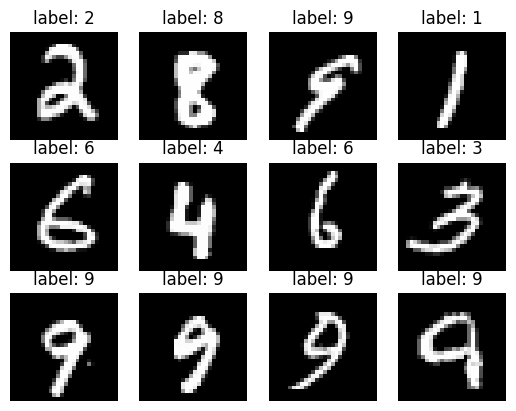

In [ ]:
# Display some image samples using matplotlib.pyplot
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(0,12):
    plt.subplot(3, 4, i+1)
    plt.imshow(images[i].numpy().squeeze(), cmap='gray'); plt.axis('off')
    plt.title("label: " + str(labels[i].numpy().squeeze()))

### **2. Build a convolutional neural network**

Let's define a **convolutional neural network** with 2 conv layers and 1 fc layer
- first conv layer: 32 filters of size $5\times 5$, stride 1, padding 2
- maxpooling layer: size 2
- second conv layer: 64 filters of size $5\times 5$, stride 1, padding 2
- maxpooling layer: size 2
- fully-connected layer with 128 neurons
- activation ReLu (after each conv layer and the fc layer)
- do not use *dropout* layer (as proposed in the tutorial) for the moment

In [ ]:
class CNN(nn.Module):

# to complete

Let's now initialize the network

In [ ]:
model = CNN()
model.to(device)

**---------------Question 1---------------**

*   Cacluate the output size of feature maps after each layer of the network.
*   Calculate also the total number of parameters of the network
*   Print the total number of trainable parameters in Pytorch ?

In [ ]:
# print number of total trainable parameters
# to complete


### **3. Train the model**

Let's set up the optimizer and the loss function. You can use the Stochastic Gradient Descent optimizer (SGD) and the Cross-entropy loss as proposed by the tutorial.

In [ ]:
# optimizer =
# criterion =

Now train and evaluate/validate the model (during the training)

In [ ]:
# to complete




Let’s plot our loss and accuracies and see if they are falling or growing.



In [ ]:
# plot the loss curves



In [ ]:
# plot the accuracy curves



**---------------Question 2---------------**

*  Your remarks and comments about the training process compared to the neural networks in Lab1 ?
*  How could we improve the performance ?

### **4. Evaluation a trained network**

Once our model is trained, we can simply use the trained weights to make some new predictions by turning off the gradients.

Let's first predict label for a single image.

In [ ]:
# to complete


Predict labels for a batch

In [ ]:
# to complete


Calculate the performance on the whole validation set

In [ ]:
# to complete


### **5. Building other CNNs**
You can also create and test other CNNs by changing the number of filters, adding more layers, etc.

Report the performance and comments on your work
  

In [ ]:
# your work


In [ ]:
# your work


In [ ]:
# your work

## PART 2: CNNs for color object recognition from CIFAR10 dataset

Now let's build CNN models to work on the CIFAR10 dataset.

Try to reach the best performance on validation by designing other CNNs.

In [ ]:
import torch
from torchvision import datasets, transforms

# Define transform to normalize data

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Download and load the training data and the validation (test) data
train_set = datasets.CIFAR10('DATA_CIFAR/', download=True, train=True, transform=transform)
trainLoader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

validation_set = datasets.CIFAR10('DATA_CIFAR/', download=True, train=False, transform=transform)
validationLoader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=True)

In [ ]:
# show the training size, test size, number of class
print("Train size : ", len(train_set))
print("validation size : ", len(validation_set))

In [ ]:
# check the size of the image tensors and label tensors
training_data = enumerate(trainLoader)
batch_idx, (images, labels) = next(training_data)

print(images.shape) # the size of the image
print(labels.shape) # the size of the labels

In [ ]:
# Display some image samples using matplotlib.pyplot
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(0,12):
    plt.subplot(3, 4, i+1)
    plt.imshow((images[i]/ 2 + 0.5).permute(1,2,0).numpy()); plt.axis('off') # (img/2+0.5) is just to unnormalize the image
    plt.title("label: " + str(labels[i].numpy().squeeze()))

In [ ]:
# to complete


In [ ]:
# to complete


In [ ]:
# to complete


In [ ]:
# to complete


In [ ]:
# plot the loss curves


In [ ]:
# plot the accuracy curves


**---------------Question 3---------------**

*  Your remarks and comments about the training process and the performance of CNN on Cifar10 ?
*  How could we improve the performance ?